In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import collections
import os
import numpy as np
from time import time
import pyintergraph

In [2]:
'''files = ['Network1_compbiology.txt', 'Network1_biology.txt',  'Network1_genetics.txt', '.txt',
'Network1_ntds.txt', 'Network1_pathogenes.txt']
'''
# Read data
def read_files(file):
    df_data = pd.read_table('Data/'+file,header=None)
    df_data.values
    
    return df_data

In [5]:
''' MAKE PLOSONE DATA SET'''
import glob
# Get all file of PLOS ONE
plos_list = glob.glob('../Data/Network1_Set*')

# Make df_values
df_data = []
for i in plos_list:
    df_data_ = pd.read_table(i, header=None)
    df_data.append(df_data_.values)
    
df_data_values = [i for chunk in df_data for i in chunk]
df_data_values = [list(df_data_values[i]) for i in range(3238415)]

In [10]:
'''Read the others's data and adjust thme into  df_data_***
'''
# Load txt data
file_name = 'Network1_compbiology.txt'
def read_files(file):
    df_data = pd.read_table('../Data/'+file_name,header=None)
    df_data.values
    return df_data

df_data_compb = read_files("Network1_compbiology.txt")
df_data_bio = read_files("Network1_biology.txt")
df_data_gene = read_files("Network1_genetics.txt")
df_data_med = read_files("Network1_medicine.txt")
df_data_ntds = read_files("Network1_ntds.txt")
df_data_path = read_files("Network1_pathogenes.txt")

df_data = read_files(file_name)
# df_data.values

# Adjust df_plosone and the others
df_data_compb_values = df_data_compb.values
df_data_bio_values = df_data_bio.values
df_data_gene_values = df_data_gene.values
df_data_med_values = df_data_med.values
df_data_ntds_values = df_data_ntds.values
df_data_path_values = df_data_path.values
df_data_plosone_values = df_data_values # PLOSONEはちょっと違う

In [11]:
# Make edge list from txt data
def make_edgelist_df(data_values):
    # Get in-node and out-node from values
    value_list_ = data_values

    # Making 'df1' that includes columns ['Paper_id', 'source', 'target'] 
    data_list = [[value_list_[i][0].split(' ')[2], value_list_[i][0].split(' ')[3], value_list_[i][0].split(' ')[4]] for i in range(len(value_list_))]
    df = pd.DataFrame(data_list, columns=['source', 'target', 'count'] )
    
    # Add weight 
    df['weight'] = [1/int(i) for i in df['count'].values]
    df = df.drop('count', axis=1)
    return df

In [12]:
df_compb = make_edgelist_df(df_data_compb_values)
df_bio = make_edgelist_df(df_data_bio_values)
df_gene = make_edgelist_df(df_data_gene_values)
df_med = make_edgelist_df(df_data_med_values)
df_ntds = make_edgelist_df(df_data_ntds_values)
df_path = make_edgelist_df(df_data_path_values)
df_plosone = make_edgelist_df(df_data_plosone_values)

In [13]:
df_compb

,source,target,weight
0,Hanah_Margalit,Aviv_Regev,0.333333
1,Hanah_Margalit,Benjamin_Gordon,0.333333
2,Hanah_Margalit,Dalit_May,0.333333
3,Hanah_Margalit,Ernest_Fraenkel,0.333333
4,Hanah_Margalit,Lena_Nekludova,0.333333
...,...,...,...
40829,Ofir_Shukron,E._Heard,0.500000
40830,Jeffrey_Chen,Jeewoen_Shin,0.500000
40831,Jeffrey_Chen,Laurie_Krug,0.500000
40832,Thomas_MacCarthy,Jeewoen_Shin,0.500000


In [15]:
# Modeling weighted-directed Graph
G_compb = nx.MultiDiGraph()
G_bio = nx.MultiDiGraph()
G_gene = nx.MultiDiGraph()
G_med = nx.MultiDiGraph()
G_ntds = nx.MultiDiGraph()
G_path = nx.MultiDiGraph()
G_plosone = nx.MultiDiGraph()

G_compb = nx.from_pandas_edgelist(df_compb, source='source', target='target', edge_attr='weight', create_using=G_compb)
# G_bio = nx.from_pandas_edgelist(df_bio, source='source', target='target', edge_attr='weight', create_using=G_bio)
# G_gene = nx.from_pandas_edgelist(df_gene, source='source', target='target', edge_attr='weight', create_using=G_gene)
# G_med = nx.from_pandas_edgelist(df_med, source='source', target='target', edge_attr='weight', create_using=G_med)
# G_ntds = nx.from_pandas_edgelist(df_ntds, source='source', target='target', edge_attr='weight', create_using=G_ntds)
# G_path = nx.from_pandas_edgelist(df_path, source='source', target='target', edge_attr='weight', create_using=G_path)
# G_plosone = nx.from_pandas_edgelist(df_plosone, source='source', target='target', edge_attr='weight', create_using=G_plosone)


# G.edges(data=True)
# print('G_di is directed:', G_bio.is_directed())

In [16]:
color=nx.get_edge_attributes(G_compb,'weight')
color

{('Hanah_Margalit', 'Aviv_Regev', 0): 0.3333333333333333,
 ('Hanah_Margalit', 'Aviv_Regev', 1): 0.25,
 ('Hanah_Margalit', 'Benjamin_Gordon', 0): 0.3333333333333333,
 ('Hanah_Margalit', 'Dalit_May', 0): 0.3333333333333333,
 ('Hanah_Margalit', 'Ernest_Fraenkel', 0): 0.3333333333333333,
 ('Hanah_Margalit', 'Lena_Nekludova', 0): 0.3333333333333333,
 ('Hanah_Margalit', 'Robert_Goldstein', 0): 0.3333333333333333,
 ('Hanah_Margalit', 'Ruth_Hershberg', 0): 0.3333333333333333,
 ('Hanah_Margalit', 'Yael_Altuvia', 0): 0.3333333333333333,
 ('Hanah_Margalit', 'Yoseph_Barash', 0): 0.3333333333333333,
 ('Hanah_Margalit', 'Yoseph_Barash', 1): 0.25,
 ('Hanah_Margalit', 'Andrew_Capaldi', 0): 0.25,
 ('Hanah_Margalit', 'Kenzie_MacIsaac', 0): 0.25,
 ('Hanah_Margalit', 'Takis_Benos', 0): 0.25,
 ('Ernest_Fraenkel', 'David_Gifford', 0): 0.16666666666666666,
 ('Ernest_Fraenkel', 'Robin_Dowell', 0): 0.16666666666666666,
 ('Ernest_Fraenkel', 'Bryan_Matthews', 0): 0.125,
 ('Ernest_Fraenkel', 'Ferah_Yildirim', 0):

In [34]:
# # Convert nx to gt
# gt_graph_compb = pyintergraph.nx2gt(G_compb)
# gt_graph_compb.save("gt_compb_fromnx.xml.gz")

# gt_graph_gene = pyintergraph.nx2gt(G_gene)
# gt_graph_gene.save("gt_gene_fromnx.xml.gz")

# gt_graph_ntds = pyintergraph.nx2gt(G_ntds)
# gt_graph_ntds.save("gt_ntds_fromnx.xml.gz")

# gt_graph_path = pyintergraph.nx2gt(G_path)
# gt_graph_path.save("gt_path_fromnx.xml.gz")

# gt_graph_med = pyintergraph.nx2gt(G_med)
# gt_graph_med.save("gt_med_fromnx.xml.gz")

# gt_graph_plosone = pyintergraph.nx2gt(G_plosone)
# gt_graph_plosone.save("gt_plosone_fromnx.xml.gz")

# gt_graph_bio = pyintergraph.nx2gt(G_bio)
# gt_graph_bio.save("gt_bio_fromnx.xml.gz")


In [11]:
def information(G):
    if G.is_directed():
        print("This is DIRECTED Graph info:")
    else:
        print("This is UNDIRECTED Graph info:")

    print(nx.info(G))
    print('Average_clstering:', nx.average_clustering(G))
    print('Tansitivity:', nx.transitivity(G))

    if G.is_directed():
        print('Strongly connected conponents:', nx.is_strongly_connected(G))
        print('Weakly connected conponens:', nx.is_weakly_connected(G))
        
# information(G_bio)

In [15]:
# result_path = '/Users/keigokusumegi/Desktop/Research-icloud/Acknowledge/result '
# os.makedirs(save_dir, exist_ok=True)

In [9]:
# Configuration model 
# degree_sequence = sorted([d for n, d in G_di.degree()], reverse=True)
# G_config = nx.configuration_model(degree_sequence, create_using = nx.Graph())

In [ ]:
'''**************** CC of all data ***************'''

In [16]:
# Change to undirected graph
G_compb_un = G_compb.to_undirected()
G_bio_un = G_bio.to_undirected()
G_gene_un = G_gene.to_undirected()
G_med_un = G_med.to_undirected()
G_ntds_un = G_ntds.to_undirected()
G_path_un = G_path.to_undirected()
G_plosone_un = G_plosone.to_undirected()

In [25]:
# Bar chart - Average Clustering Coefficient
cc_compb = nx.average_clustering(G_compb_un)
cc_bio = nx.average_clustering(G_bio_un)
cc_gene = nx.average_clustering(G_gene_un)
cc_med = nx.average_clustering(G_med_un)
cc_ntds = nx.average_clustering(G_ntds_un)
cc_path = nx.average_clustering(G_path_un)
cc_plosone = nx.average_clustering(G_plosone_un)


In [ ]:
'''**************** CC of LCC ***************
Under this row, start contents of LCC'''

In [33]:
# Check proportion of LCC
def proportion_gcc(G):
    gcc, extra = components(G)
    list_extra = [li for outer in extra for li in outer]
    if len(gcc) + len(list_extra) == nx.number_of_nodes(G):
            proportion = len(gcc)/nx.number_of_nodes(G)
    else:
        print(" ERROR: #nodes isn't equvalent")

    return proportion

# Extract weakly connected components
def components(G):
    if G.is_directed:
        weak_components = sorted(nx.weakly_connected_components(G), key=len, reverse=True)
        gcc, extra = weak_components[0], weak_components[1:]
        return gcc, extra
    else:
        print("This is undirected graph")

In [34]:
# Extract LCC 
glist = [G_compb, G_bio, G_gene, G_med, G_ntds, G_path, G_plosone]
gcclist = []
for g in glist:
    g_gcc, extra = components(g)
    gcclist.append(g_gcc)
    
gcclist

[{'Gisbert_Schneider',
  'Giulietta_Spudich',
  'Helena_Barroso',
  'Zhi_Wang',
  'christian_Auclair',
  'Mohammad_Jafarmadar',
  'Dan_Graur',
  'Drs_Wen-Chang_Li',
  'Lorelei_A._Mucci',
  'J._Błażewicz',
  'Matthieu_Barbier',
  'Gordon_Mills',
  'Roeland_M._H._Merks',
  'Maxime_Maheu',
  'Ian_T_Paulsen',
  'Jinyan_Du',
  'Isidore_Rigoutsos',
  'Frank_J._Poelwijk',
  'John_A._Capra',
  'Lynn_Eckert',
  'Rachel_Franchi',
  'Trisha_N._Davis',
  'Nimrod_D._Rubinstein',
  'Obi_L._Griffith',
  'F._Marinelli',
  'Bernd_Bukau',
  'Israel_Nelken',
  'David_Perahia',
  'Xinan_Yang',
  'Dustin_Holloway',
  'Charles_Taylor',
  'Lance_Davison',
  'The_Genographic_Consortium',
  'Roland_Schäfer',
  'Renzo_Kottmann',
  'Steven_Rosenfeld',
  'Brandon_Barker',
  'Tomoki_Fukai',
  'Jeanette_A._Mumford',
  'H._Green',
  'Konrad_P._Kording',
  'Jane_Kondev',
  'Branka_Čajavec',
  'Nicole_Stoesser',
  'Stacey_Willard',
  'Joshua_McMichael',
  'Bram_Van_de_Sande',
  'David_Alonso',
  'E._Noor',
  'Keith_A_

In [45]:
# Proportion of GCC in full network
gcc_proportion_list = []
for g in glist:
    p = proportion_gcc(g)
    gcc_proportion_list.append(p)
    
gcc_proportion_list # Return each gcc's proportion of whole network

[0.6385655276004506,
 0.6847881946993613,
 0.9244607029717906,
 0.7008276697395869,
 0.864293486709156,
 0.9171257009577688,
 0.9568854238575619]

In [35]:
# LCCのCCのリスト

# glist = [G_compb, G_bio, G_gene, G_med, G_ntds, G_path, G_plosone]
gcc_cc_list = []
for index, gcc in enumerate(gcclist):
    g_gcc = glist[index].subgraph(gcc) # Subgraph of gcc
    cc_gcc = nx.average_clustering(g_gcc) # Calculate CC of gcc
    gcc_cc_list.append(cc_gcc)  

# gcc_cc_list # Return CC of each gcc

[0.01556666055815697,
 0.0037979956645517263,
 0.008128931755028539,
 0.006408402841009901,
 0.013816388835565624,
 0.008137567995342331,
 0.012826732771463881]

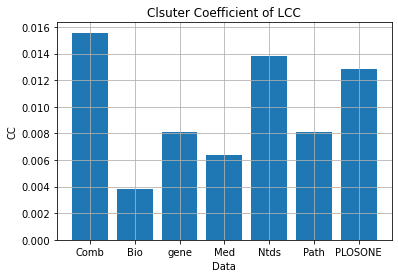

In [25]:
'''Visuzalize CC of LCC'''

x = ["Comb", "Bio", "gene", "Med", "Ntds", "Path", "PLOSONE",]
y = gcc_cc_list

x_position = np.arange(len(x))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid(True)
plt.title("Clsuter Coefficient of LCC")
plt.xlabel("Data")
plt.ylabel("CC")

ax.bar(x_position, y, tick_label=x)
save_dir = "/Users/keigo/Desktop/Research-icloud/Acknowledge/result/cc/"
fig.savefig(save_dir + 'clustering_gcc.png')

In [ ]:
'''CC of LCC with configration model'''

In [37]:
# Make configuration model
configlist = []
for index, gcc in enumerate(gcclist):
    g_gcc = glist[index].subgraph(gcc) # Subgraph of gcc
    
    # configuration model
    in_degree_sequence = sorted([d for n, d in g.in_degree()], reverse=True)
    out_degree_sequence = sorted([d for n, d in g.out_degree()], reverse=True)
    g_config = nx.directed_configuration_model(in_degree_sequence, out_degree_sequence, create_using=nx.DiGraph() )
    configlist.append(g_config)

# CC of config model
config_cc_list = []
for g in configlist:
#     g_gcc = glist[index].subgraph(gcc) # Subgraph of gcc
    cc_config = nx.average_clustering(g) # Calculate CC of gcc
    config_cc_list.append(cc_config)  

config_cc_list # Return CC of each config model

[0.00045400885739175226,
 0.0004355596171927327,
 0.00044718806771842733,
 0.00044761698767524293,
 0.00044213222247820646,
 0.00044652200219664855,
 0.0004374590479879253]

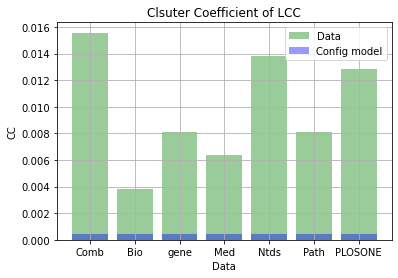

In [38]:
# Visuzalize CC of gcc
x = ["Comb", "Bio", "gene", "Med", "Ntds", "Path", "PLOSONE",]
y_data = gcc_cc_list
y_config = config_cc_list

x_position = np.arange(len(x))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid(True)
plt.title("Clsuter Coefficient of LCC")
plt.xlabel("Data")
plt.ylabel("CC")
    
p1 = ax.bar(x_position, y_data, tick_label=x, alpha=0.4, color="green")
p2 = ax.bar(x_position, y_config, tick_label=x, alpha=0.4, color="blue")

plt.legend((p1[0], p2[0]), ("Data", "Config model")) # 凡例

save_dir = "/Users/keigo/Desktop/Research-icloud/Acknowledge/result/cc/"
fig.savefig(save_dir + 'clustering_with_config.png')

In [ ]:
'''***************** The end of CC ************************************'''

In [ ]:
'''CC of LCC with configration model'''

In [ ]:
# Check proportion of LCC
def proportion_gcc(G):
    gcc, extra = components(G)
    list_extra = [li for outer in extra for li in outer]
    if len(gcc) + len(list_extra) == nx.number_of_nodes(G):
            proportion = len(gcc)/nx.number_of_nodes(G)
    else:
        print(" ERROR: #nodes isn't equvalent")

    return proportion

# Extract weakly connected components
def components(G):
    if G.is_directed:
        weak_components = sorted(nx.weakly_connected_components(G), key=len, reverse=True)
        gcc, extra = weak_components[0], weak_components[1:]
        return gcc, extra
    else:
        print("This is undirected graph")
 

glist = [G_compb, G_bio, G_gene, G_med, G_ntds, G_path, G_plosone]
gcclist = []
for g in glist:
    g_gcc, extra = components(g)
    gcclist.append(g_gcc)
    

In [8]:
# # Create Random graph with some degree
# def randomGraph_node_degree(G, average_degree):
#     G = G.to_undirected()
#     num_node = nx.number_of_nodes(G)
#     p = average_degree/(num_node - 1)
#     G_rand = nx.fast_gnp_random_graph(num_node, p)

#     return G_rand
  
# # Degree distribution
# def degree_distribution(G, average_degree, save_pic_name):
#     # Make radom graph
#     G_rand = randomGraph_node_degree(G, average_degree)

#     # Preparation of original graph
#     # degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
#     # degreeCount = collections.Counter(degree_sequence)
#     # deg, cnt = zip(*degreeCount.items())
    
#     # Preparation of original graph
#     degree_sequence_in = sorted([d for n, d in G.in_degree()], reverse=True)
#     degreeCount_in = collections.Counter(degree_sequence_in)
#     deg_in, cnt_in = zip(*degreeCount_in.items())

#     # Preparation of original graph
#     degree_sequence_out = sorted([d for n, d in G.out_degree()], reverse=True)
#     degreeCount_out = collections.Counter(degree_sequence_out)
#     deg_out, cnt_out = zip(*degreeCount_out.items())

#     # Preparation of random graph
#     degree_sequence_rand = sorted([d for n, d in G_rand.degree()], reverse=True)  
#     degreeCount_rand = collections.Counter(degree_sequence_rand)
#     deg_rand, cnt_rand = zip(*degreeCount_rand.items())

#     # Make plotting setup
#     fig, ax = plt.subplots()
#     plt.title("Degree distribution" + save_pic_name)
#     plt.ylabel("Count")
#     plt.xlabel("Degree")
#     ax.set_yscale('log')
# #     ax.set_xlim([0, 70]) # x方向の描画範囲を指定

#     # ax.scatter(deg, cnt, color='blue', label='compbiology', marker='.') # Plot Original graph
#     ax.scatter(deg_in, cnt_in, color='red', label='indegree', marker='.') # Plot Original graph - in degreee
#     ax.scatter(deg_out, cnt_out, color='green', label='outdegree', marker='.') # Plot Original graph - out degree 
#     ax.plot(deg_rand,cnt_rand, color='purple', label='random', marker='.') # Plot Random graph

#     ax.legend(loc='upper right') # 凡例


#     # Save pic
#     filename = save_dir + "deg_" + save_pic_name + ".png"
#     plt.savefig(filename)

#     plt.show()

# degree_distribution(G_di, 5.3775, 'gene') # G_di or G_undi

NameError: name 'G_di' is not defined

In [ ]:
# Weakly connected conponents
# Visualize GCC comonents
def visualize_gcc_di(gcc, save_pic_name):
    G0 = G_di.subgraph(gcc)
    pos = nx.spring_layout(G0) 
    # Graph of LCC
    nx.draw(G0,
                with_labels=False,
                edge_color='lavender',
                width=6.0,
                alpha=0.3,
                node_size=10
            )
    filename = save_dir + "gccNet_" + save_pic_name + ".png"
    plt.savefig(filename)
    
# Visualize extra components 
def visualize_extra_di(extra, save_pic_name):
    for Gi in extra:
            if len(Gi) > 1:
                nx.draw(G_di.subgraph(Gi),
                        with_labels=False,
                        node_color='lightslategrey', 
                        edge_color='lavender',
                        alpha=0.3,
                        width=10.0,
                        node_size=10
                    )
    filename = save_dir + "extraNet_" + save_pic_name + ".png"
    plt.savefig(filename)

# Check proportion of GCC
def proportion_gcc(G):
    gcc, extra = components(G)
    list_extra = [li for outer in extra for li in outer]
    if len(gcc) + len(list_extra) == nx.number_of_nodes(G):
            proportion = len(gcc)/nx.number_of_nodes(G)
    else:
        print(" ERROR: #nodes isn't equvalent")

    return proportion

# Extract weakly connected components
def components(G):
    if G.is_directed:
        weak_components = sorted(nx.weakly_connected_components(G), key=len, reverse=True)
        gcc, extra = weak_components[0], weak_components[1:]
        return gcc, extra
    else:
        print("This is undirected graph")